Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from tensorflow import train
import math
from keras.callbacks import EarlyStopping
import time


In [2]:
def function(x,y):
    return math.cos(x+6*0.35*y) + 2*0.35*x*y

Creating dataset with 5000 samples to implement a (simple) neural network with TensorFlow 

In [3]:
train_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(100)])
train_outputs = np.array([function(i[0],i[1]) for i in train_inputs])
test_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(81)])
test_outputs = np.array([function(i[0],i[1]) for i in test_inputs])

Splitting dataset into test and training set


In [4]:
print(train_inputs.shape)
print(train_outputs.shape)
print(test_inputs.shape)
print(test_outputs.shape)

(100, 2)
(100,)
(81, 2)
(81,)


Build Model

In [5]:
model1 = keras.Sequential()
model1.add(layers.Dense(2, activation="sigmoid", input_shape=(2,)))
model1.add(layers.Dense(1, activation="sigmoid"))

model2 = keras.Sequential()
model2.add(layers.Dense(8, activation="sigmoid", input_shape=(2,)))
model2.add(layers.Dense(1, activation="sigmoid"))

model3 = keras.Sequential()
model3.add(layers.Dense(50, activation="sigmoid", input_shape=(2,)))
model3.add(layers.Dense(1, activation="sigmoid"))

overfitCallback = EarlyStopping(monitor='loss', min_delta=0.005, patience = 50)

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Selecting Optimizer 

In [7]:
optimizer1 = tf.compat.v1.train.GradientDescentOptimizer(0.2)
optimizer2 = tf.compat.v1.train.GradientDescentOptimizer(0.2)
optimizer3 = tf.compat.v1.train.GradientDescentOptimizer(0.2)

Compiling Models

In [8]:
model1.compile(optimizer=optimizer1, loss='MSE')
model2.compile(optimizer=optimizer2, loss='MSE')
model3.compile(optimizer=optimizer3, loss='MSE')

Training Models with training dataset 

In [9]:
history1= model1.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])
history2= model2.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])
history3= model3.fit(train_inputs,train_outputs,epochs=1000000,validation_data=(test_inputs,test_outputs),batch_size=1,callbacks=[overfitCallback])

Epoch 1/1000000
100/100 [==============================] - 0s 3ms/step - loss: 0.2204 - val_loss: 0.2140
Epoch 2/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2146 - val_loss: 0.2129
Epoch 3/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2122 - val_loss: 0.2144
Epoch 4/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2101 - val_loss: 0.2133
Epoch 5/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2076 - val_loss: 0.2160
Epoch 6/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2057 - val_loss: 0.2121
Epoch 7/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2061 - val_loss: 0.2127
Epoch 8/1000000
100/100 [==============================] - 0s 2ms/step - loss: 0.2044 - val_loss: 0.2132
Epoch 9/1000000
100/100 [==============================] - 0s 1ms/step - loss: 0.2032 - val_loss: 0.2158
Epoch 10/1000000
100/100 [=============================

Plotting training and validation loss

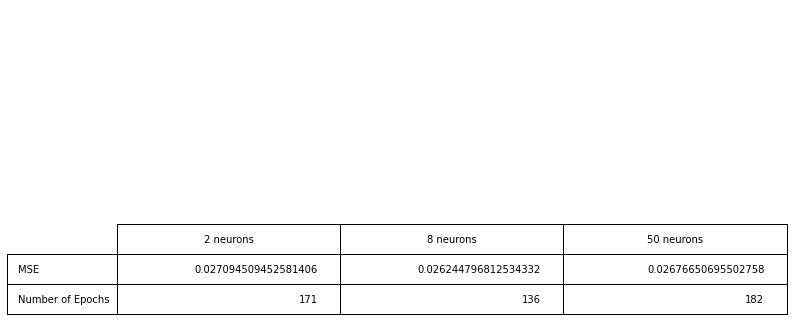

In [10]:
n_epochs2 = len(history1.history['loss'])
n_epochs8 = len(history2.history['loss'])
n_epochs50 = len(history3.history['loss'])
columns = ('2 neurons', '8 neurons', '50 neurons')
rows = ('MSE', 'Number of Epochs')

mse2 = history1.history['loss'][n_epochs2 - 1]
mse8 = history2.history['loss'][n_epochs8 - 1]
mse50 = history3.history['loss'][n_epochs50 - 1]

train_inputs = np.array([[uniform(-1,1) for _ in range(2)] for _ in range(100)])
cell_text = [[0 for _ in range(3)] for _ in range(2)]
cell_text[0][0] = mse2
cell_text[0][1] = mse8
cell_text[0][2] = mse50
cell_text[1][0] = n_epochs2
cell_text[1][1] = n_epochs8
cell_text[1][2] = n_epochs50

the_table = plt.table(cellText=cell_text,rowLabels=rows,colLabels=columns)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
the_table.scale(2, 2.5)
plt.show()

In [11]:
data = np.array([[0.01, 0.32], [0.22, 0.02]])
prediction1 = model1.predict(data)
prediction2 = model2.predict(data)
prediction3 = model3.predict(data)
print(prediction1)
print(prediction2)
print(prediction3)
print(function(0.01,0.32))
print(function(0.22,0.02))

[[0.7017605 ]
 [0.85403186]]
[[0.7168932 ]
 [0.88902354]]
[[0.64130205]
 [0.8523139 ]]
0.7785535783963625
0.9689538845941909


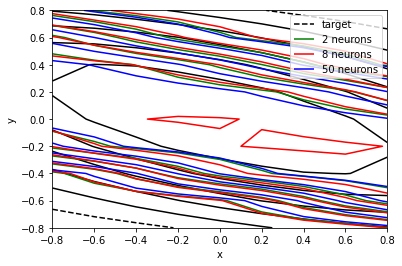

In [12]:
xs = np.arange(-0.8, 1, 0.2)
ys = np.arange(-0.8, 1, 0.2)
target = []
for y in ys:
    target.append([function(x,y) for x in xs])
p1 = []
for y in ys:
    p1.append([model1.predict([[x,y]])[0][0] for x in xs])
p2 = []
for y in ys:
    p2.append([model2.predict([[x,y]])[0][0] for x in xs])
p3 = []
for y in ys:
    p3.append([model3.predict([[x,y]])[0][0] for x in xs])
target = np.array(target)
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
np.shape(target)
np.shape(p1)
np.shape(p2)
np.shape(p3)
X, Y = np.meshgrid(xs, ys)
CS = plt.contour(X, Y, target, colors='k')
neuron2 = plt.contour(X, Y, p1, colors='g')
neuron8 = plt.contour(X, Y, p2, colors='r')
neuron50 = plt.contour(X, Y, p3, colors='b')
l1,_ = CS.legend_elements()
l2,_ = neuron2.legend_elements()
l3,_ = neuron8.legend_elements()
l4,_ = neuron50.legend_elements()
plt.legend([l1[0], l2[0], l3[0], l4[0]], ['target', '2 neurons', '8 neurons', '50 neurons']) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

4. Sigmoid activation functions were used in these experiments